Projet 6: Prédiction du Prix de l'Immobilier
Contexte
La prédiction des prix de l'immobilier est essentielle pour les agents immobiliers et les acheteurs potentiels afin de prendre des décisions informées.

Problème
Vous devez développer un modèle pour prédire les prix de l'immobilier et déployer une application qui permet aux utilisateurs de soumettre des caractéristiques de propriétés pour obtenir une estimation du prix.

Dataset
Lien: house prices data

Instructions
Importer et explorer le dataset.
Prétraiter les données (gestion des valeurs manquantes, encodage des variables catégorielles).
Entraîner un modèle de prédiction des prix (par exemple, une régression linéaire, XGBoost).
Évaluer la performance du modèle.
Créer une application web pour permettre la prédiction des prix de l'immobilier.
Déployer l'application

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Nous allons charger le jeu de données (train), dans un dataframe que nous nommerons ici `data`.
Le jeu de données (test) dans un dataframe 'datatest'.
Le jeu de données (sample_submission) dans un dataframe 'datasample'
Nous afficherons ensuite les 5 premières valeurs de data.

In [2]:
data = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')
datasample = pd.read_csv('sample_submission.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Nous allons à présent fussionner la deuxième colonne de 'sample_submission.csv' qui comporte les prix de vente avec le fichier 'test.csv'
L'objectif est de rassembler toutes les données des fichiers en un seul jeu de données pour le prétraitement.

In [4]:
col_B = datasample.iloc[:, 1]                      # Extraction de la deuxième colonne de datasample
datatest["SalePrice"] = col_B.values               # Création dans datatest de la colonne des prix 
datatest = datatest.iloc[1:].reset_index(drop=True) # Supression de la ligne des noms de colonnes dans datatest
print(data.columns.equals(datatest.columns))        # Verifier si datatest et data ont la même taille

True


In [5]:
# Fusion des deux jeux de donnés et création d'un fichier csv bilan

datafus = pd.concat([data, datatest], axis=0, ignore_index=True)
for col in datafus.columns:
    datafus[col] = pd.to_numeric(datafus[col], errors="ignore")
datafus.dtypes
datafus.to_csv("fichierfus.csv", index=False)

# <a name="C2">A- Nettoyage du jeu de données</a>

Plusieurs **erreurs** se sont glissées dans ce jeu de données. Nous allons donc passer au nettoyage

In [6]:
# Types de données
datafus.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
datafus.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
datafus.shape

(2918, 81)

In [9]:
datafus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2914 non-null   object 
 3   LotFrontage    2432 non-null   float64
 4   LotArea        2918 non-null   int64  
 5   Street         2918 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2918 non-null   object 
 8   LandContour    2918 non-null   object 
 9   Utilities      2916 non-null   object 
 10  LotConfig      2918 non-null   object 
 11  LandSlope      2918 non-null   object 
 12  Neighborhood   2918 non-null   object 
 13  Condition1     2918 non-null   object 
 14  Condition2     2918 non-null   object 
 15  BldgType       2918 non-null   object 
 16  HouseStyle     2918 non-null   object 
 17  OverallQual    2918 non-null   int64  
 18  OverallC


### Traitement des valeurs manquantes

In [10]:
# Supression des lignes doubles
data = data.drop_duplicates()
datatest = datatest.drop_duplicates()
# Point des cellules avec valeurs non existantes
missing = datafus.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          2908
MiscFeature     2813
Alley           2720
Fence           2348
MasVnrType      1765
FireplaceQu     1419
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Exterior2nd        1
BsmtUnfSF          1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF2         1
KitchenQual        1
Electrical         1
dtype: int64

In [ ]:
Toutes les valeurs nulles ne signifient pas forcement Valeurs Manquantes.
CAS 1 : Absence normal des équipements.
Les valeurs manquantes correspondent à  l’absence de l’équipement concerné 
(garage, piscine, sous-sol, etc.). Elles ont donc été remplacées pour conserver
la structure par la modalité None.

In [11]:
none_cols = [
    "PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"
]

datafus[none_cols] = datafus[none_cols].fillna("None")


In [ ]:
Cas 2 : Variables numériques liées à un équipement
Dans ce cas, si la valeur est absente , cela signifie que la valeur est nulle
Par exemple, une surface inexistante donnera 0

In [12]:
numtest_median_cols = [
    "LotFrontage", "MasVnrArea", "GarageYrBlt",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "GarageArea", "GarageCars",
    "BsmtFullBath", "BsmtHalfBath"
]

for col in numtest_median_cols:
    datafus[col] = datafus[col].fillna(datatest[col].median())

On observe que notre jeu de données contient 3 valeurs manquantes. Regardons les plus en détails :

In [ ]:
Cas 3 : Très peu de valeurs manquantes
On remplace ces valeurs par le mode de la série

In [13]:
# 2. Colonnes catégorielles → valeur la plus fréquente (mode)
cattest_mode_cols = [
    "MSZoning", "Utilities", "Exterior1st",
    "Exterior2nd", "KitchenQual",
    "Functional", "SaleType"
]

for col in cattest_mode_cols:
   datafus[col] = datafus[col].fillna(datafus[col].mode()[0])

In [19]:
# Cas particulier : MasVnrType
# NA signifie "pas de parement"
datafus["MasVnrType"] = datafus["MasVnrType"].fillna("None")

datafus["Electrical"] =datafus["Electrical"].fillna(
    datafus["Electrical"].mode()[0]
)

# Vérification finale
missing = datafus.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [ ]:

### Analyse de Correlation

In [35]:

# Analyse de corrélation avec le prix 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [38]:
# Colonnes numériques
numeric_cols = datafus.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Colonnes catégorielles
categorical_cols = datafus.select_dtypes(include=['object']).columns.tolist()

# Corrélation numérique avec le prix
corr_price = datafus[numeric_cols].corr()["SalePrice"].sort_values(ascending=False)
print("Top variables numériques corrélées avec le prix :")
print(corr_price)

Top variables numériques corrélées avec le prix :
SalePrice        1.000000
GrLivArea        0.588081
OverallQual      0.550921
TotRmsAbvGrd     0.469812
GarageCars       0.469255
GarageArea       0.465002
1stFlrSF         0.462860
TotalBsmtSF      0.453220
FullBath         0.433725
YearBuilt        0.362054
Fireplaces       0.353561
MasVnrArea       0.351868
YearRemodAdd     0.350037
GarageYrBlt      0.313538
LotFrontage      0.300977
LotArea          0.296512
BsmtFinSF1       0.272226
2ndFlrSF         0.272120
WoodDeckSF       0.238411
OpenPorchSF      0.236352
BedroomAbvGr     0.229588
HalfBath         0.228812
BsmtUnfSF        0.175191
BsmtFullBath     0.147670
ScreenPorch      0.082476
PoolArea         0.081036
MoSold           0.067217
3SsnPorch        0.029973
MiscVal         -0.000042
BsmtFinSF2      -0.007362
Id              -0.011630
BsmtHalfBath    -0.012750
LowQualFinSF    -0.015402
YrSold          -0.038975
OverallCond     -0.065762
EnclosedPorch   -0.070723
KitchenAbvGr  

In [ ]:
Corrélation forte / moyenne positive :
GrLivArea (surface habitable) : 0.588
OverallQual (qualité générale) : 0.551
TotRmsAbvGrd (nombre de pièces) : 0.470
GarageCars et GarageArea : ~0.465
1stFlrSF et TotalBsmtSF : 0.46 / 0.45
FullBath : 0.43

Corrélation faible :

2ndFlrSF, WoodDeckSF, OpenPorchSF : ~0.23–0.27

BedroomAbvGr, HalfBath : ~0.22

Corrélation négative ou très faible :

MiscVal, BsmtFinSF2, Id, YrSold, OverallCond : ~0 ou légèrement négatif

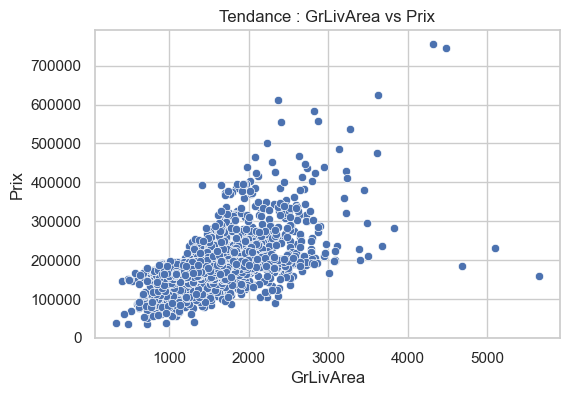

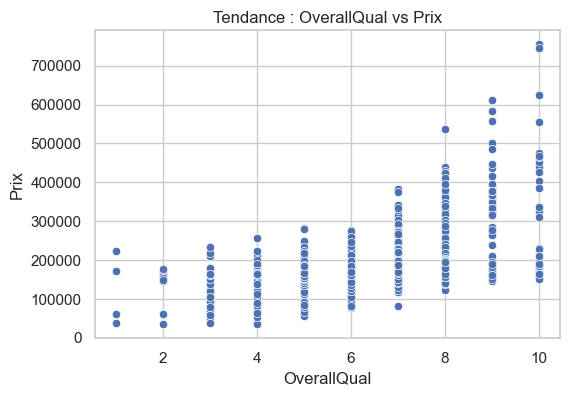

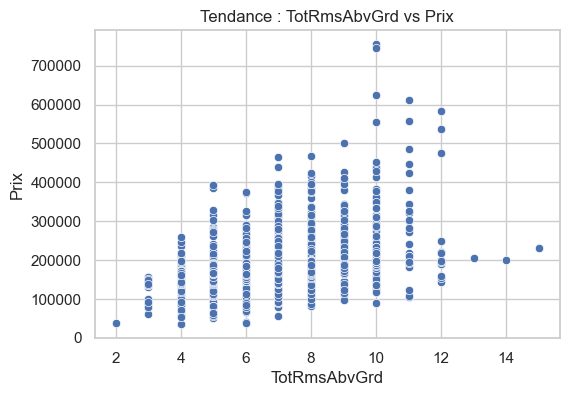

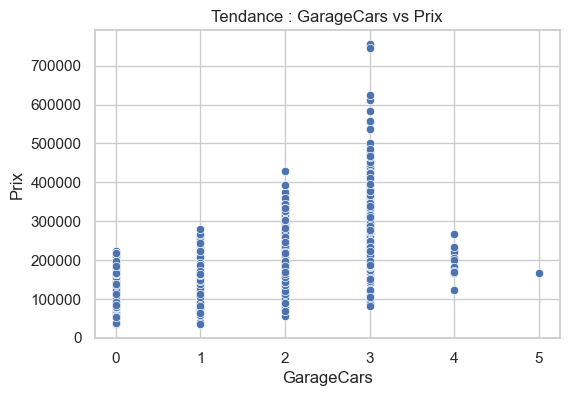

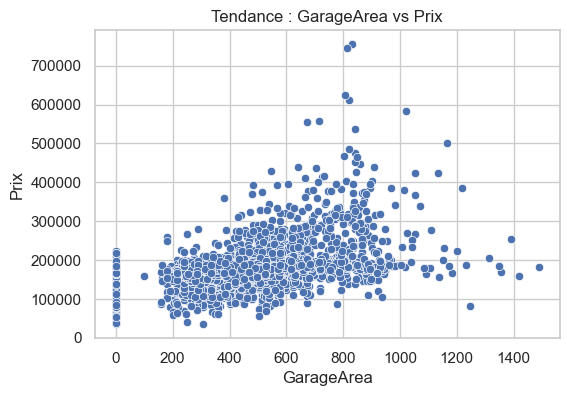

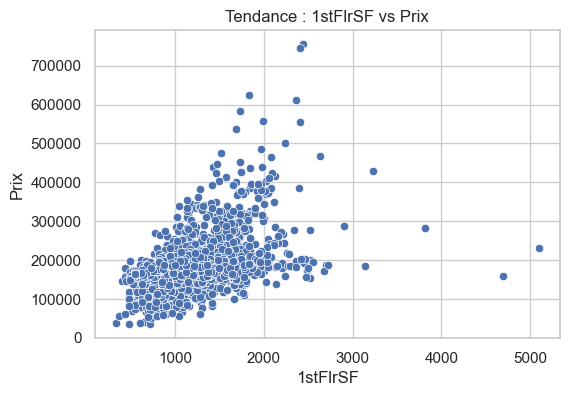

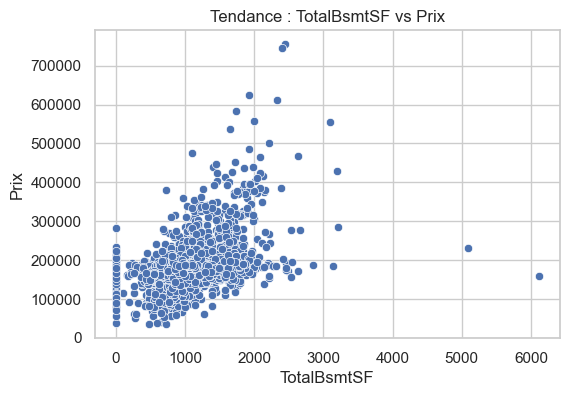

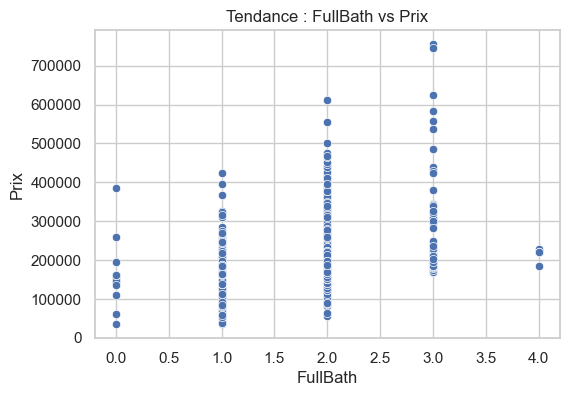

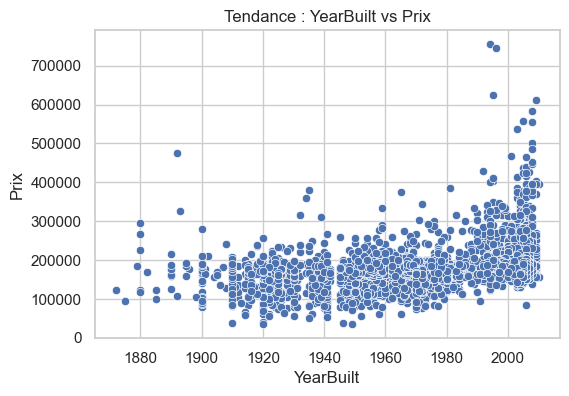

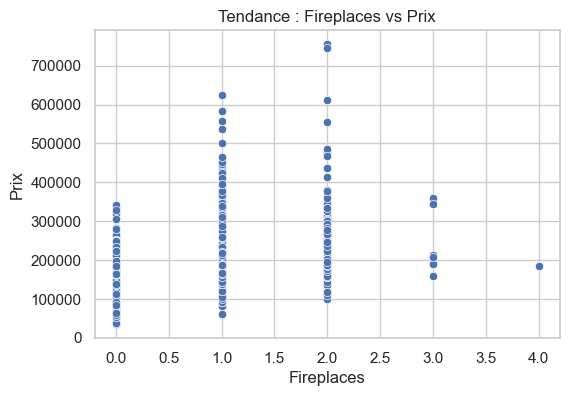

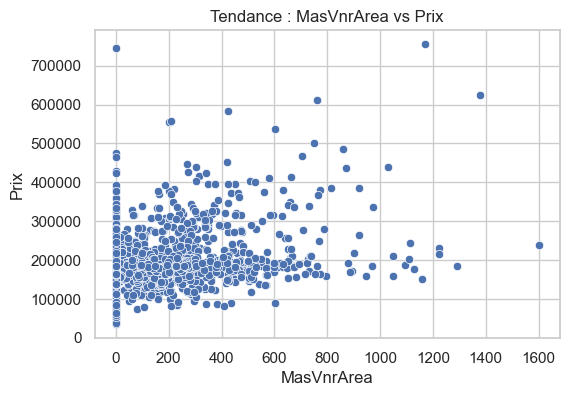

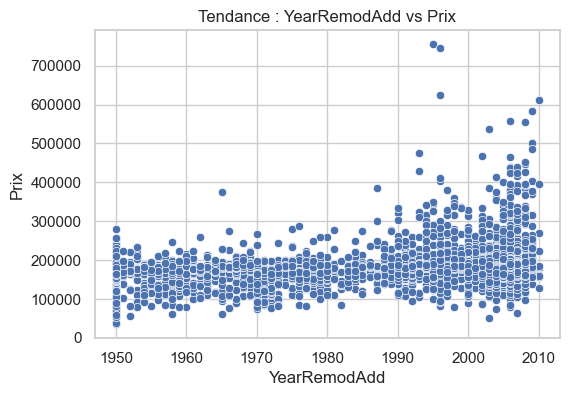

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des variables numériques fortement corrélées avec le prix
top_numeric_vars = [
    "GrLivArea", "OverallQual", "TotRmsAbvGrd", "GarageCars",
    "GarageArea", "1stFlrSF", "TotalBsmtSF", "FullBath",
    "YearBuilt", "Fireplaces", "MasVnrArea", "YearRemodAdd"
]

# Scatterplots
for var in top_numeric_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=var, y="SalePrice", data=datafus)
    plt.title(f"Tendance : {var} vs Prix")
    plt.xlabel(var)
    plt.ylabel("Prix")
    plt.show()


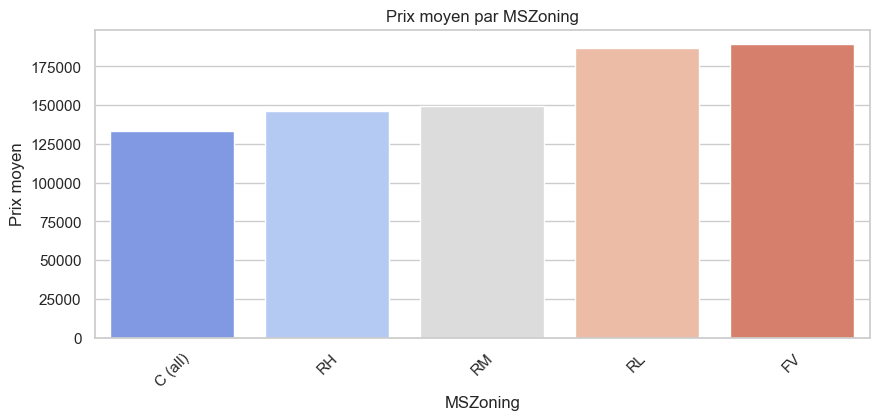

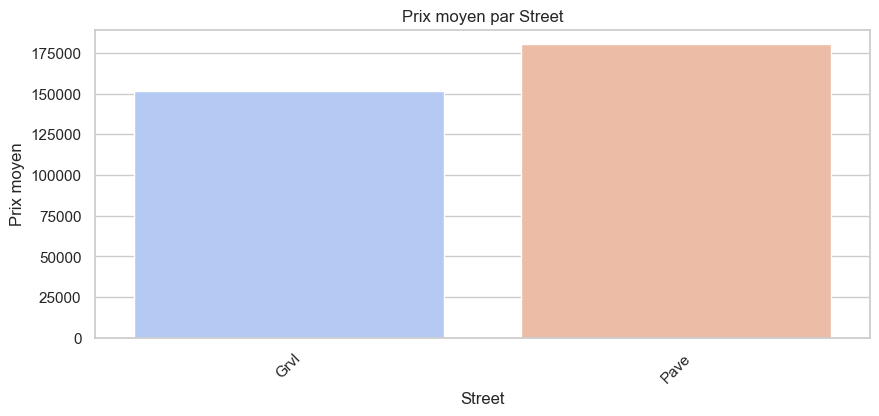

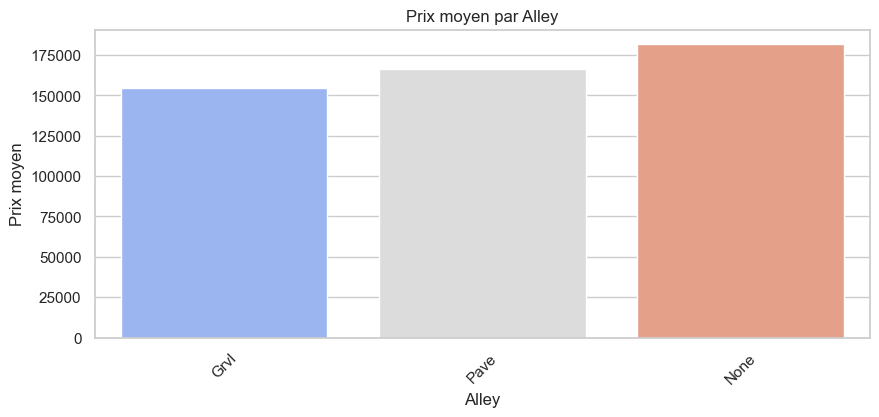

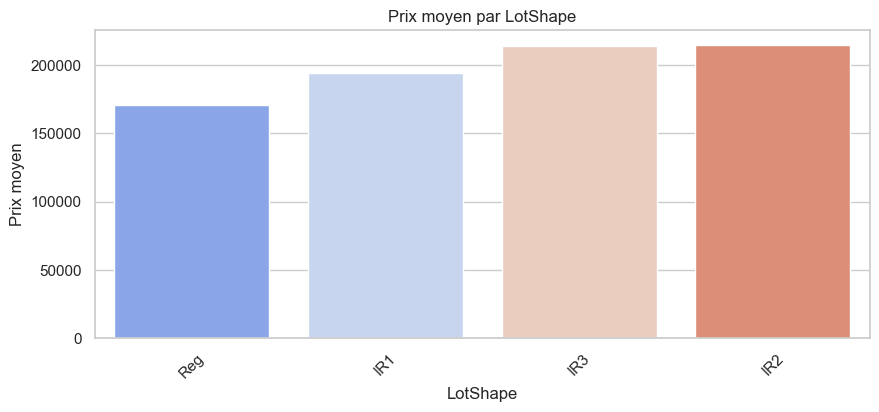

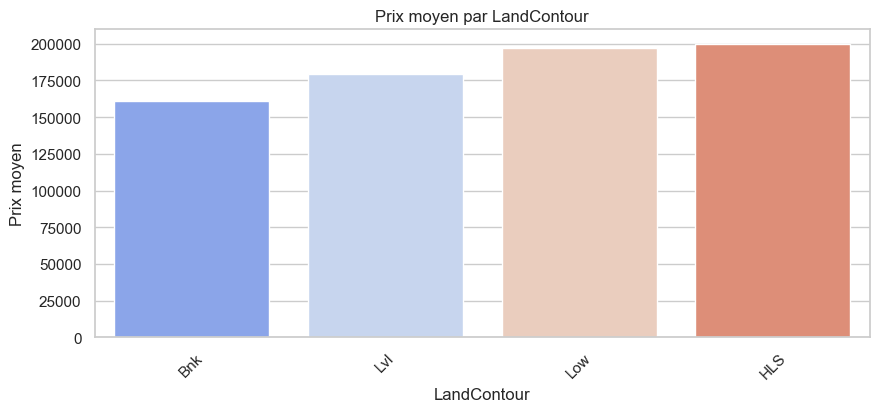

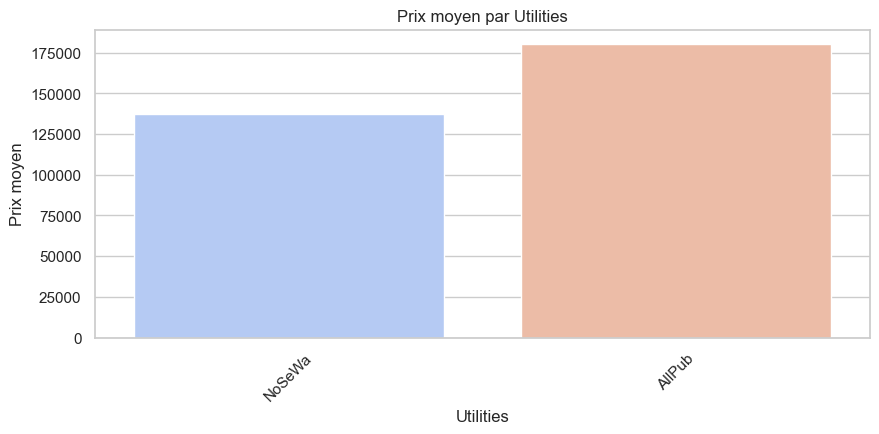

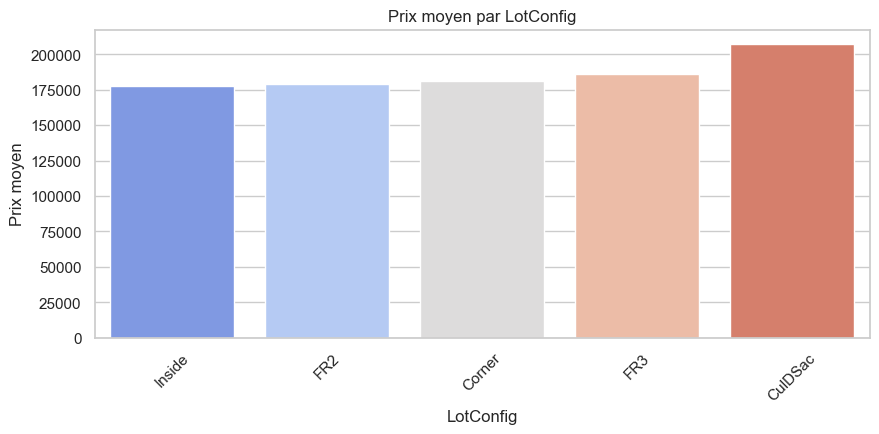

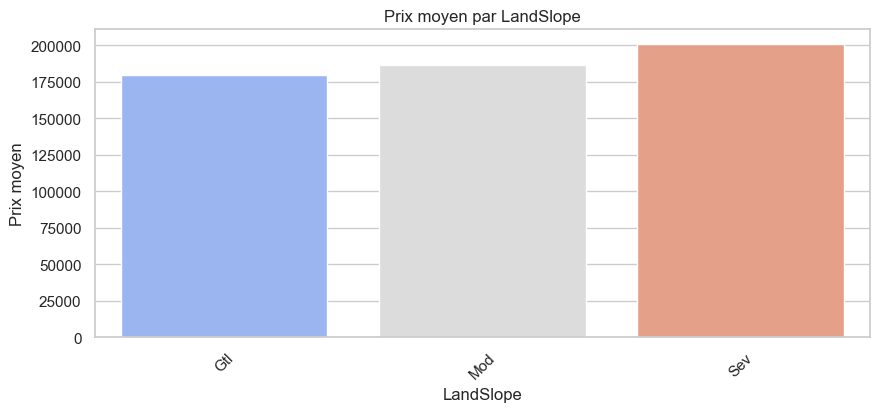

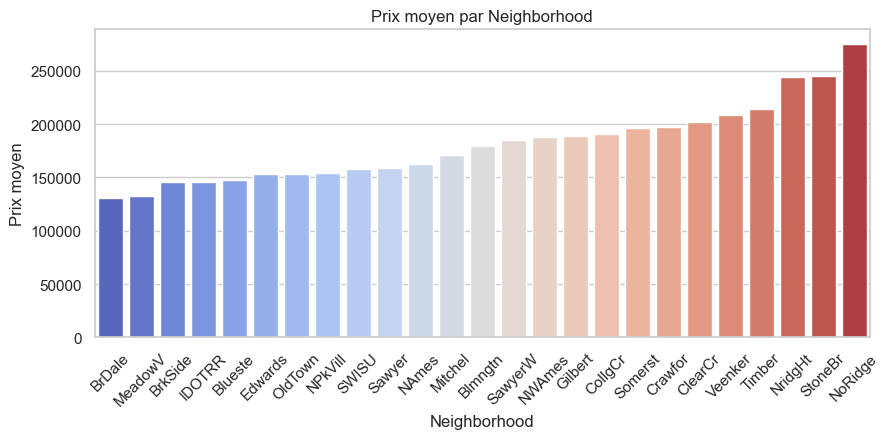

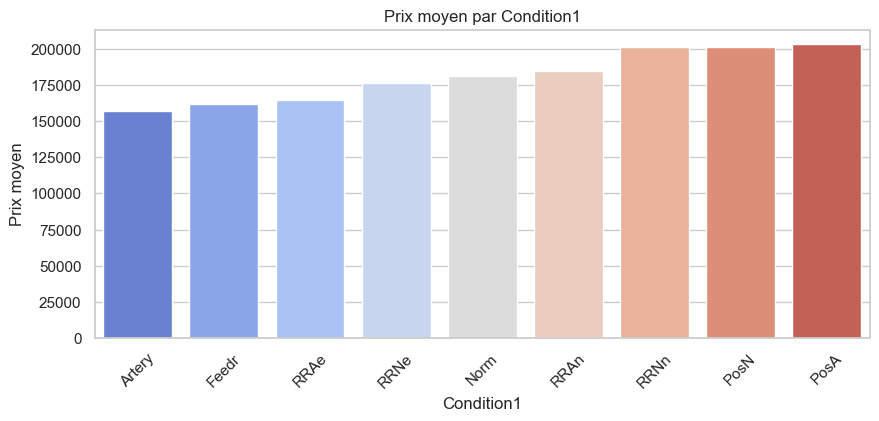

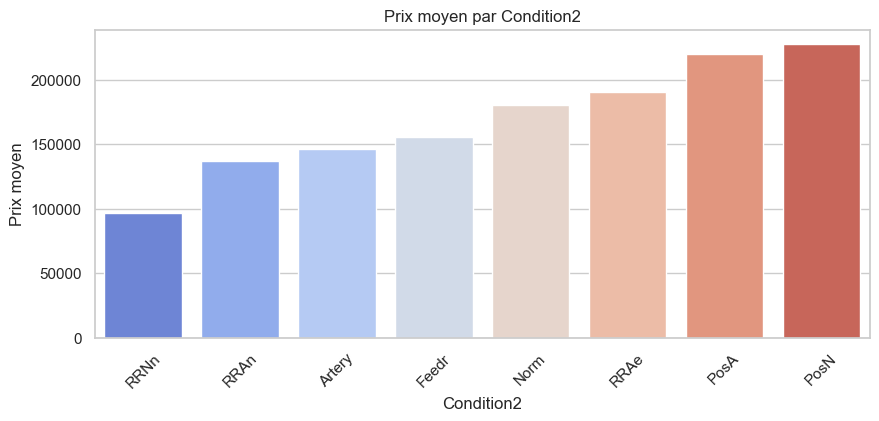

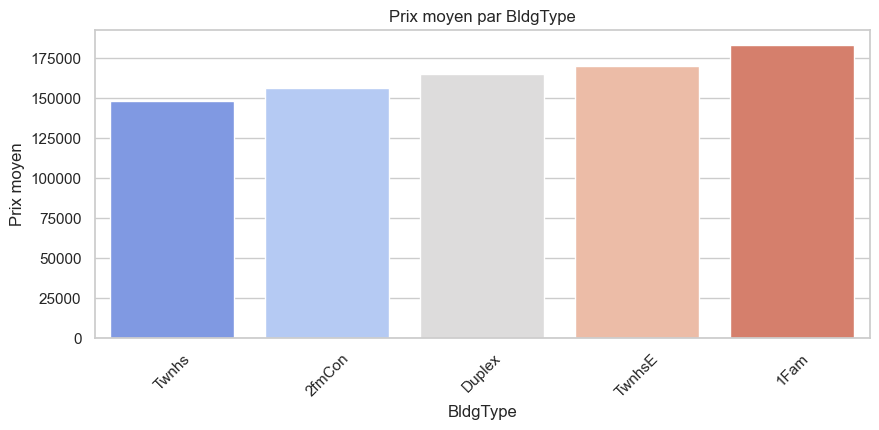

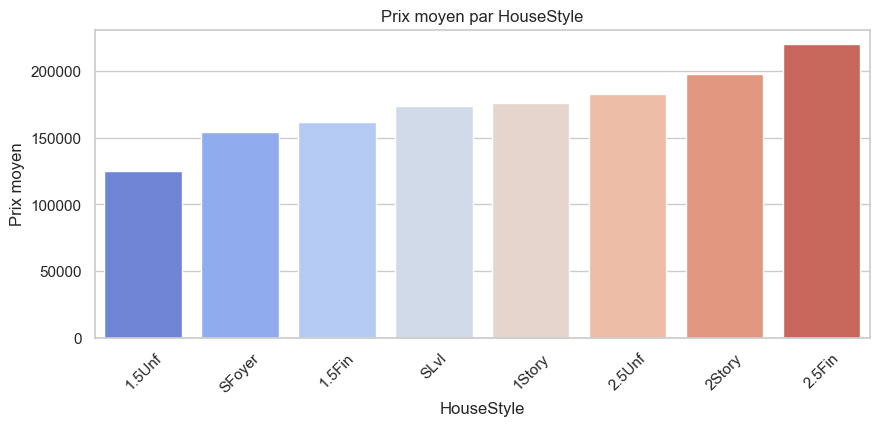

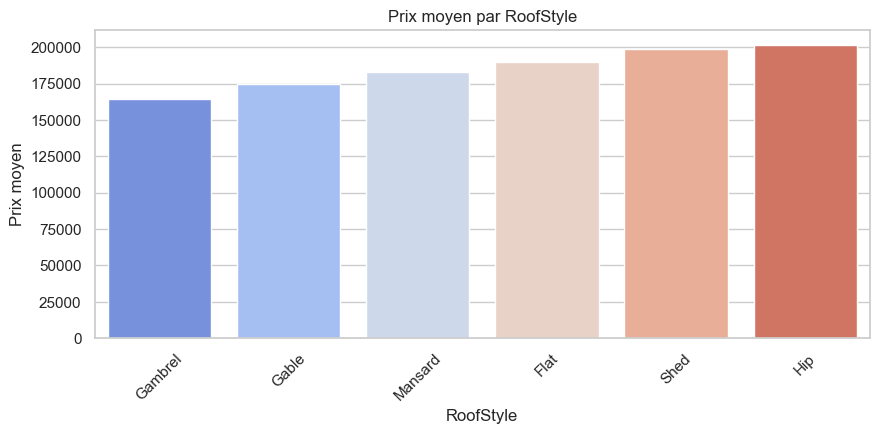

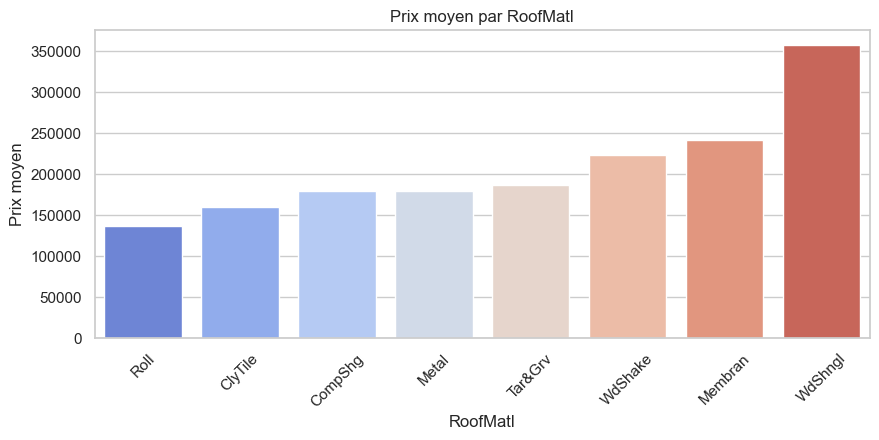

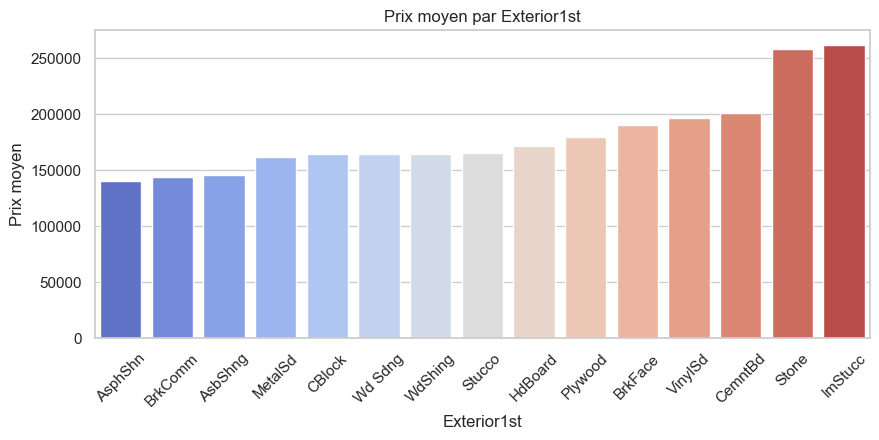

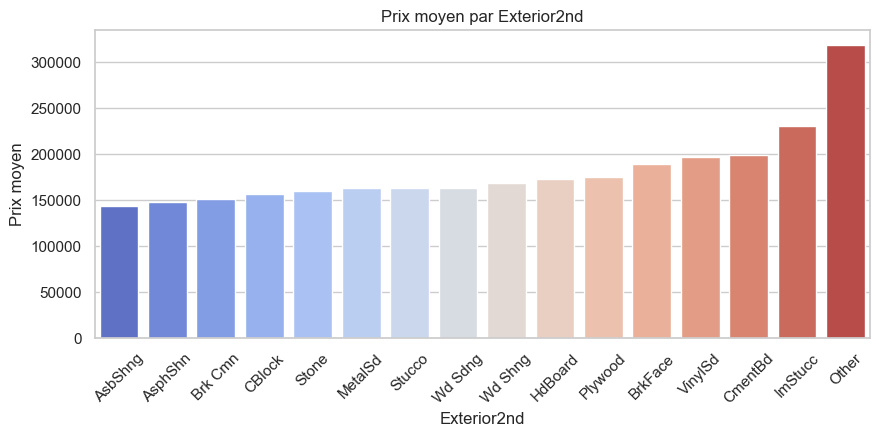

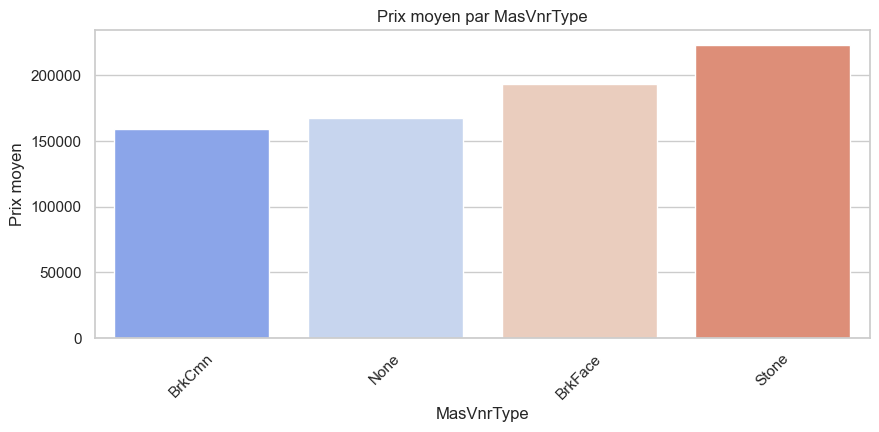

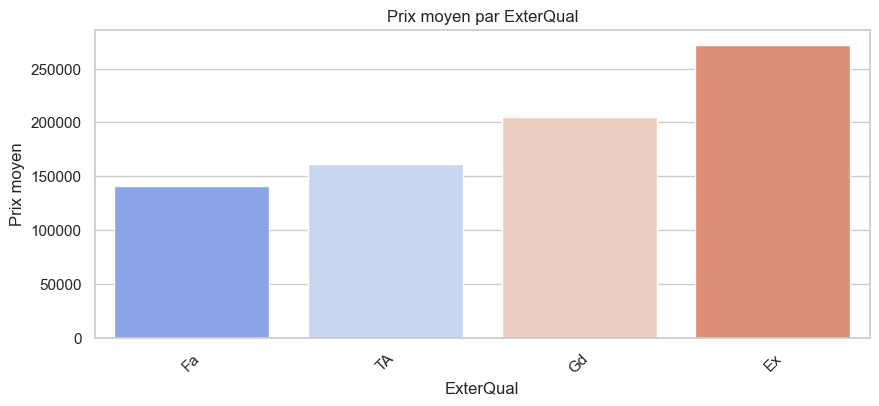

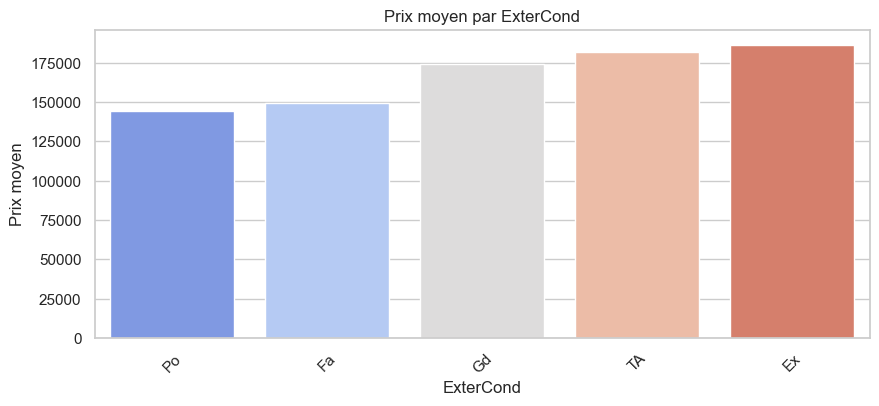

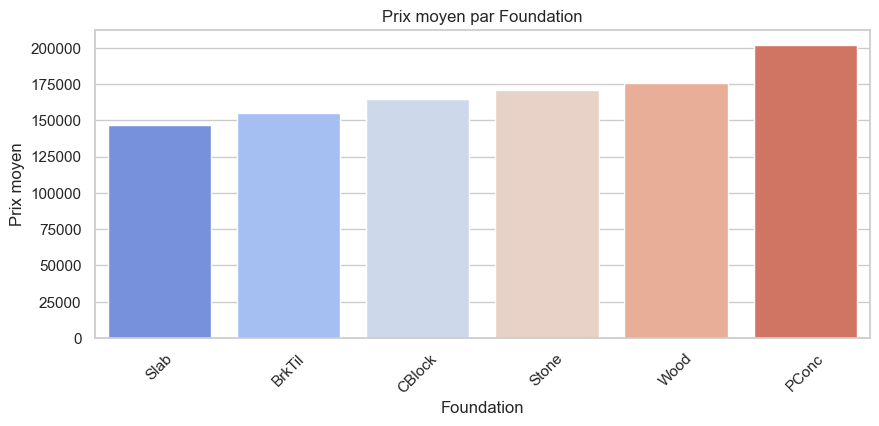

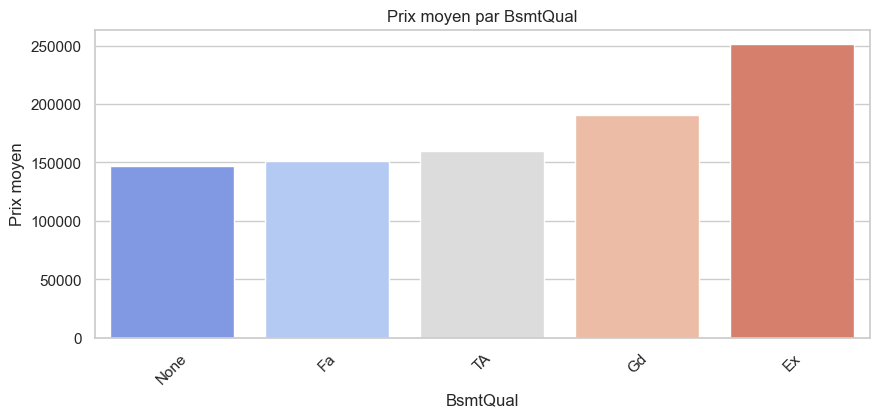

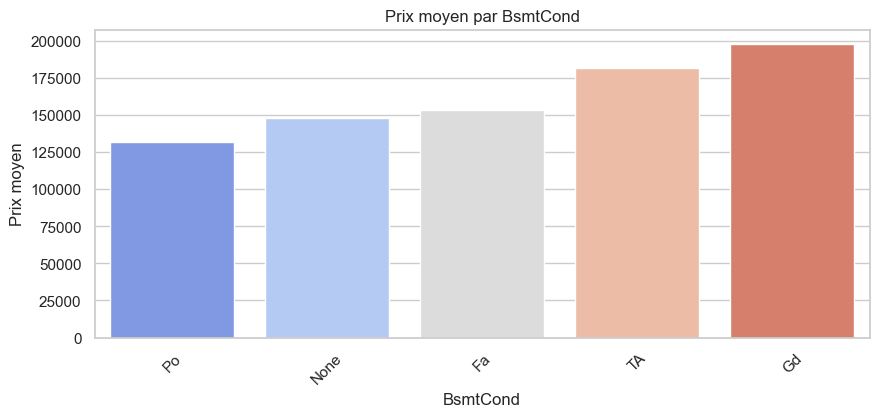

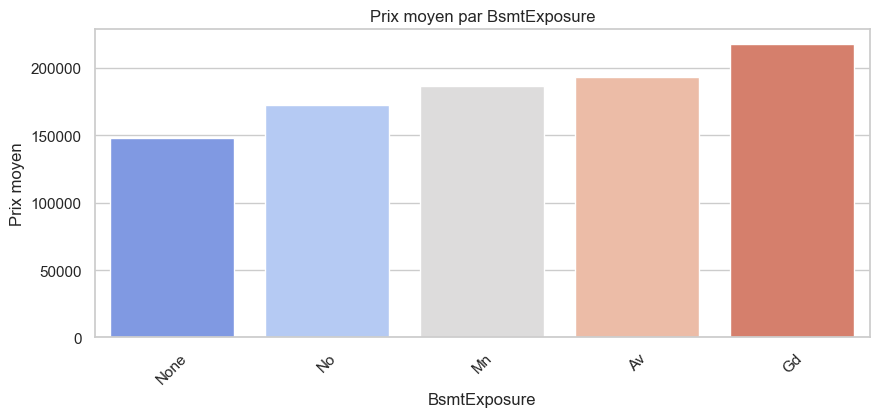

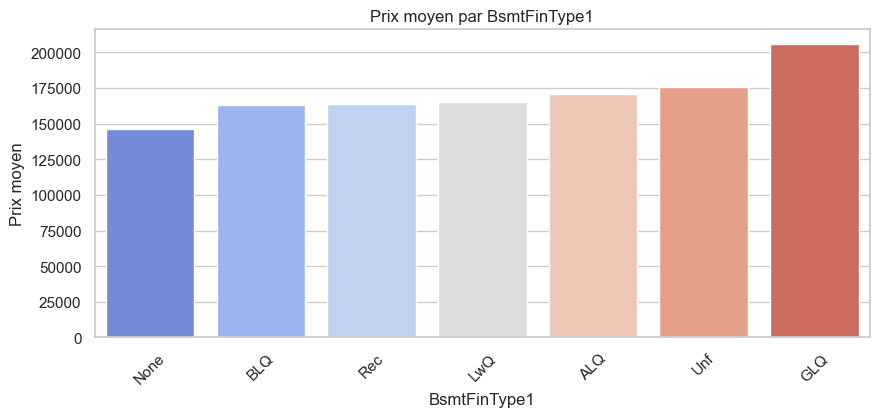

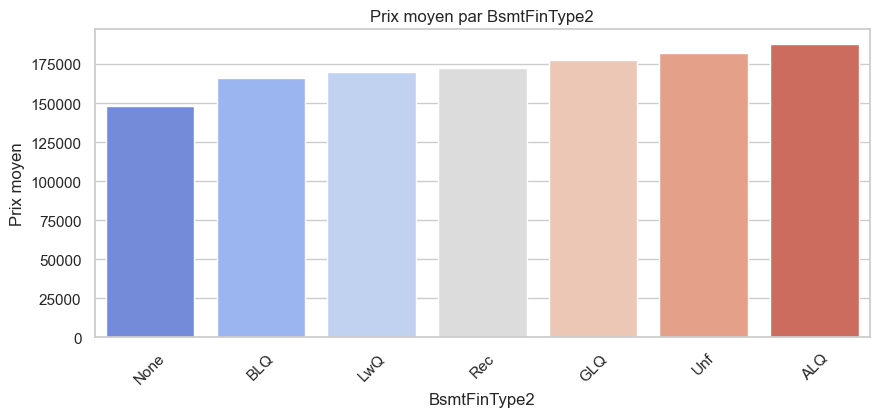

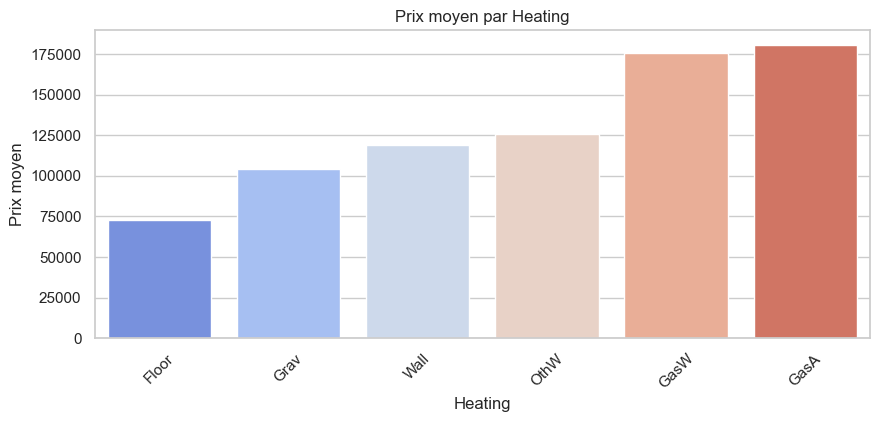

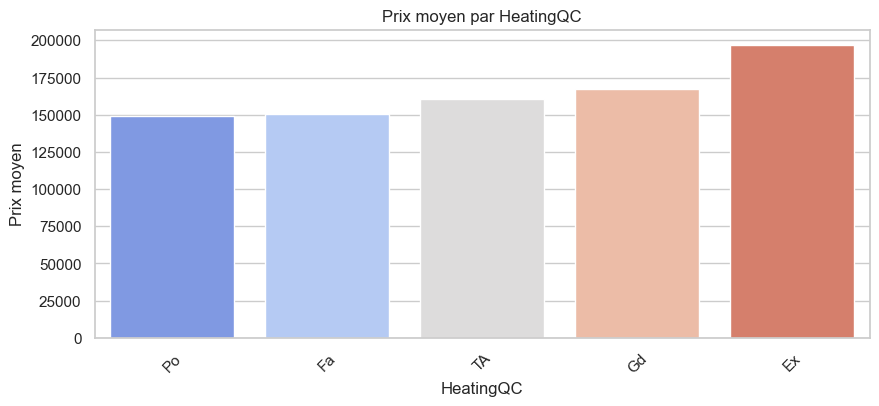

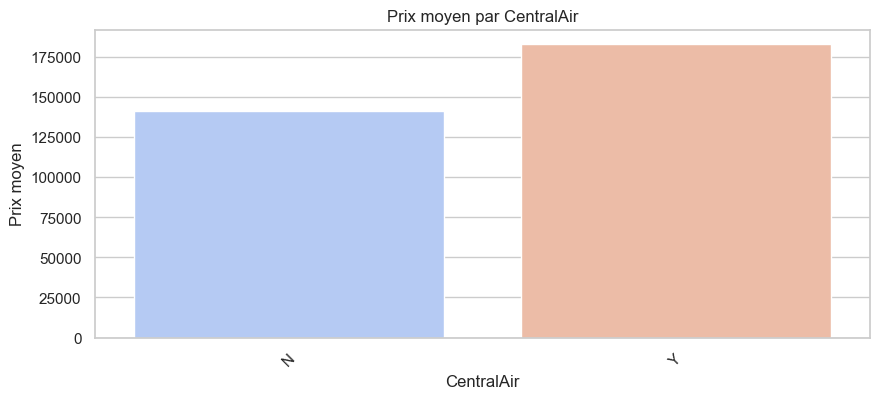

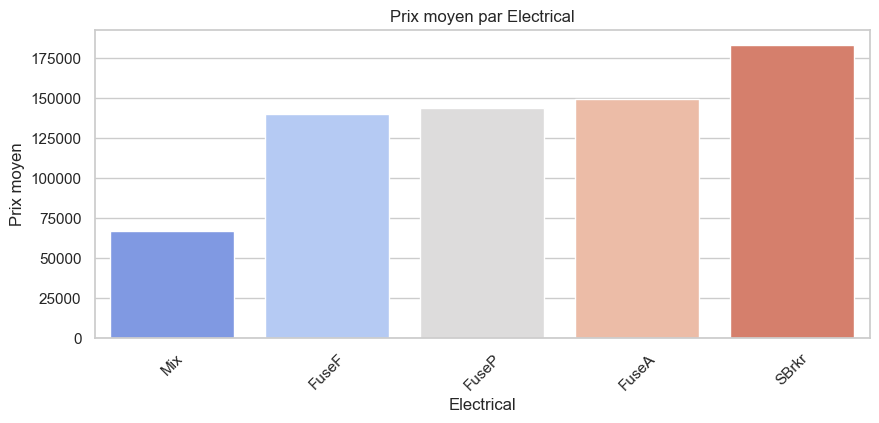

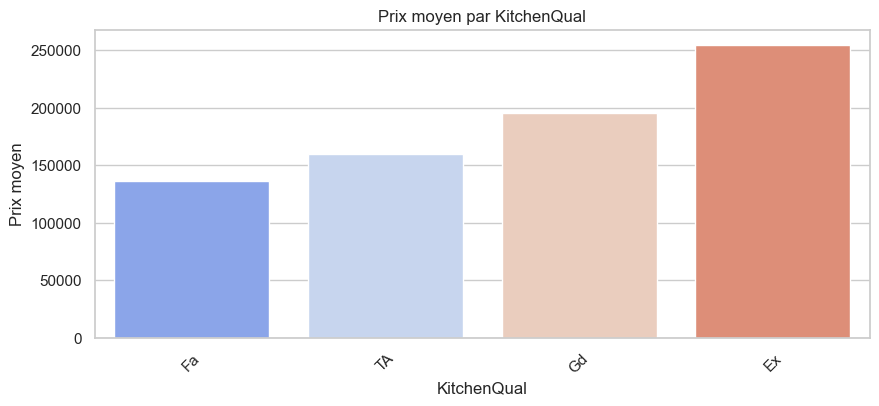

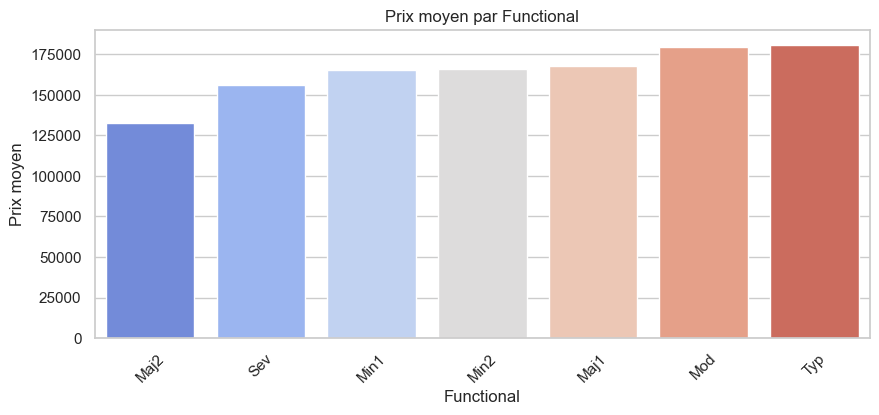

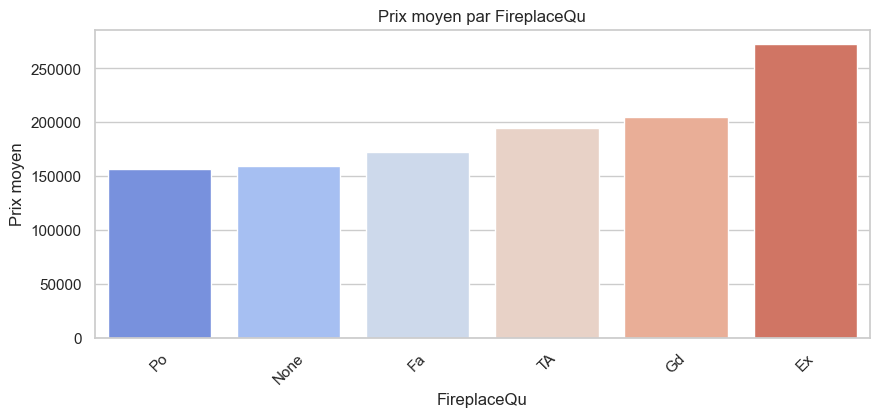

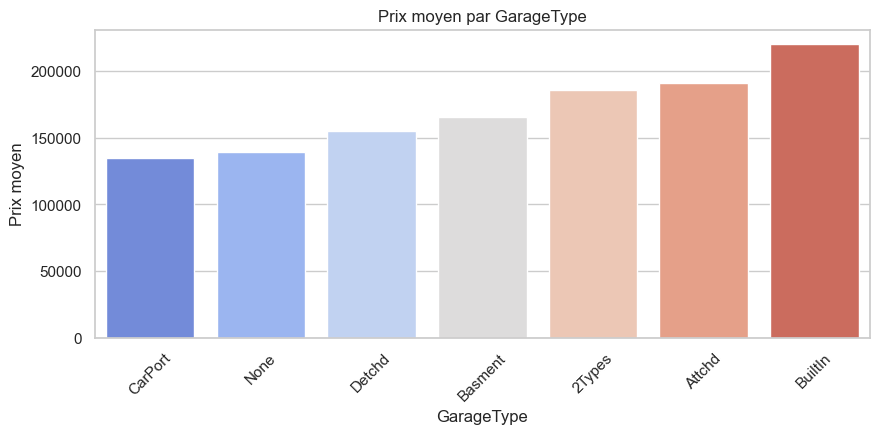

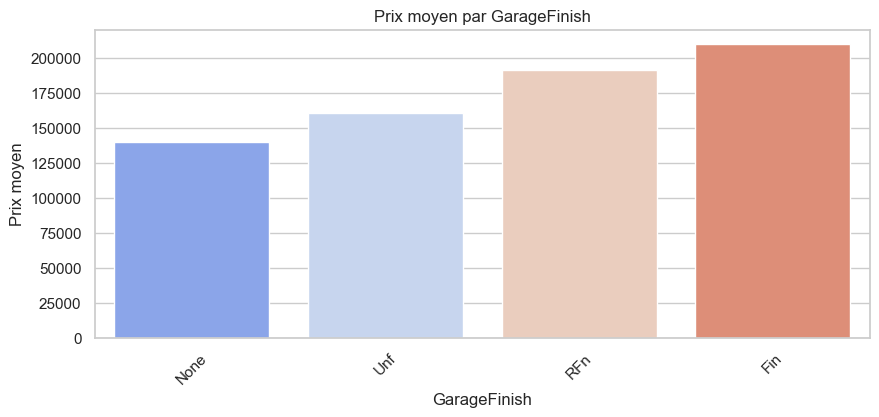

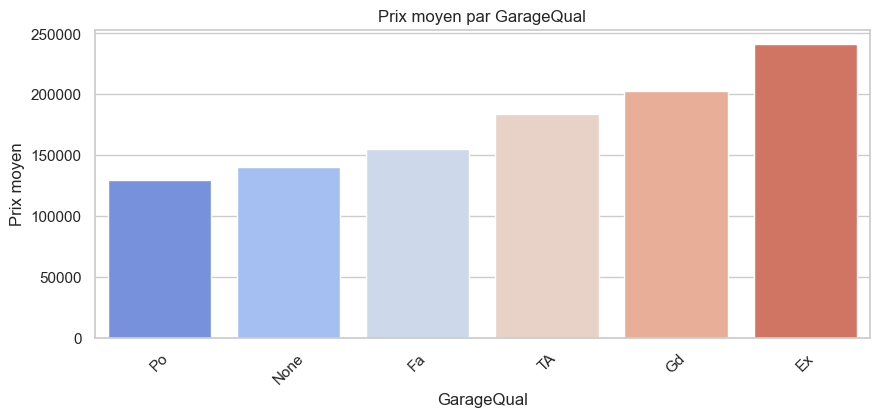

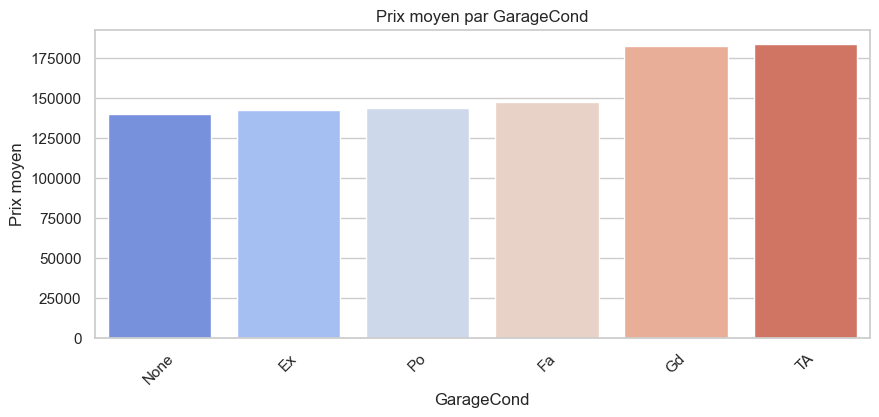

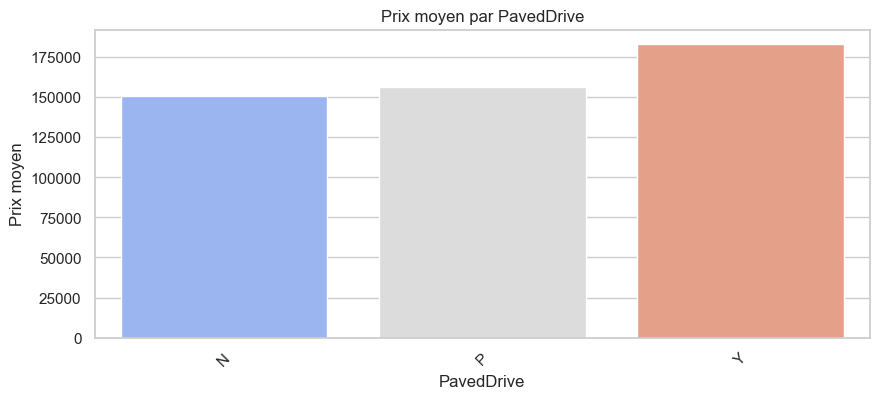

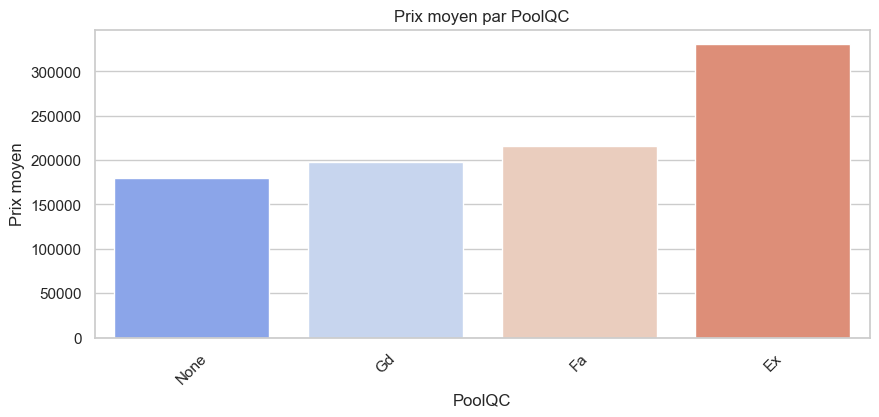

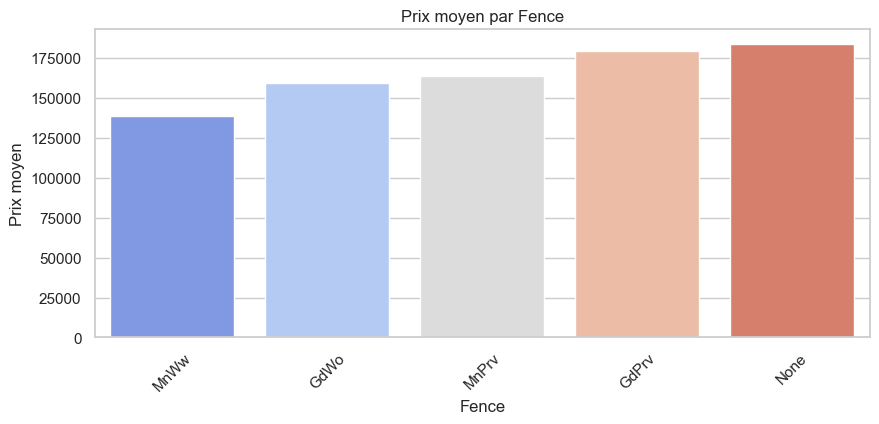

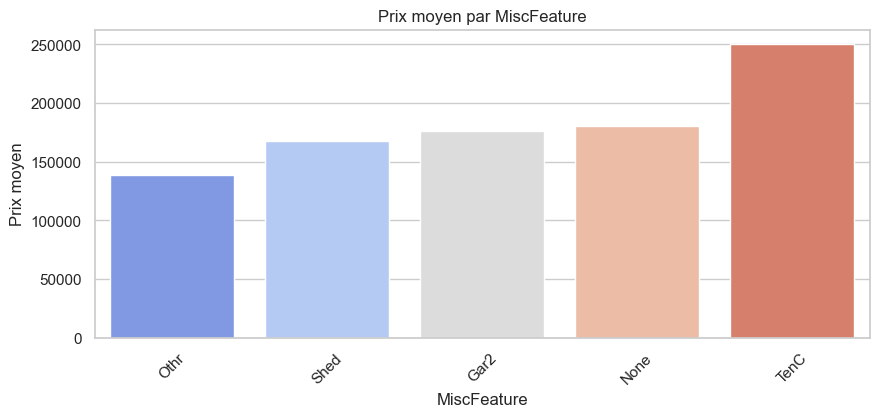

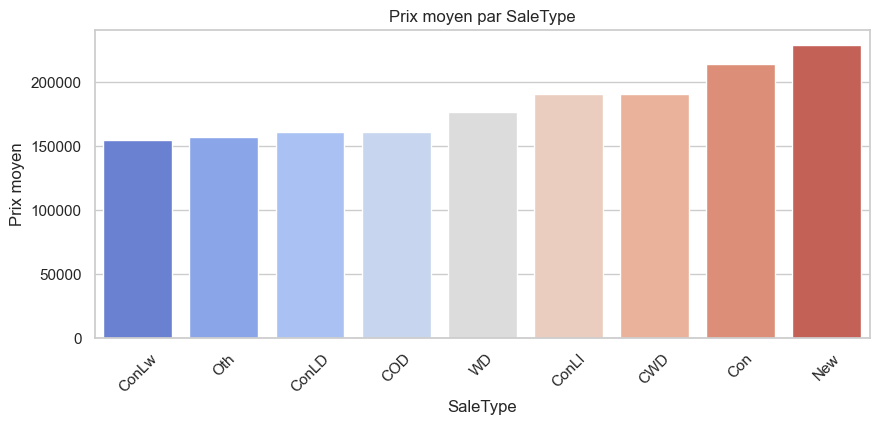

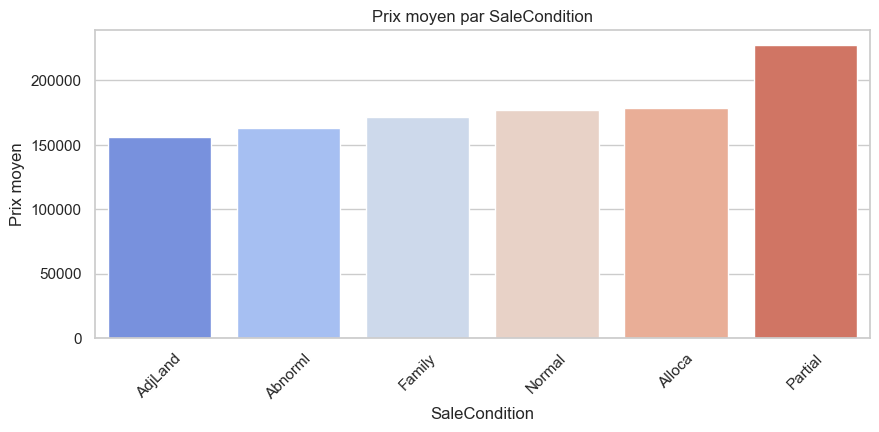

In [40]:
# Barplots pour les variables catégorielles
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    avg_price = datafus.groupby(col)["SalePrice"].mean().sort_values()
    sns.barplot(x=avg_price.index, y=avg_price.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Prix moyen par {col}")
    plt.ylabel("Prix moyen")
    plt.show()

In [45]:
datafus.groupby("Neighborhood")["SalePrice"].mean().sort_values()


Neighborhood
BrDale     131115.774599
MeadowV    132416.435267
BrkSide    145220.512937
IDOTRR     146009.863881
Blueste    147818.180856
Edwards    153536.157230
OldTown    153584.509587
NPkVill    153789.328802
SWISU      158269.946222
Sawyer     159222.157177
NAmes      162754.617877
Mitchel    171442.470149
Blmngtn    179745.053659
SawyerW    184962.239069
NWAmes     188242.409880
Gilbert    188999.065887
CollgCr    190383.778312
Somerst    196386.237168
Crawfor    197075.993040
ClearCr    201841.549164
Veenker    208532.115596
Timber     214270.893727
NridgHt    243751.175245
StoneBr    245141.360470
NoRidge    275074.860533
Name: SalePrice, dtype: float64

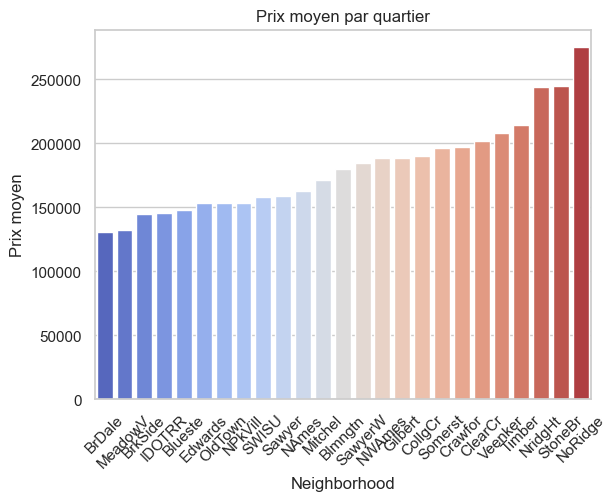

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price = datafus.groupby("Neighborhood")["SalePrice"].mean().sort_values()
sns.barplot(x=avg_price.index, y=avg_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Prix moyen par quartier")
plt.ylabel("Prix moyen")
plt.show()


In [ ]:
pip install streamlit pandas scikit-learn xgboost
 # Dans le terminal,se placer dans le dossier prediction_immobilier et lancer
streamlit run app.py

In [ ]:
# <a name="C2">DEPLOIEMENT L"APPLICATION</a>

In [ ]:
REALISE AVEC Steamlit